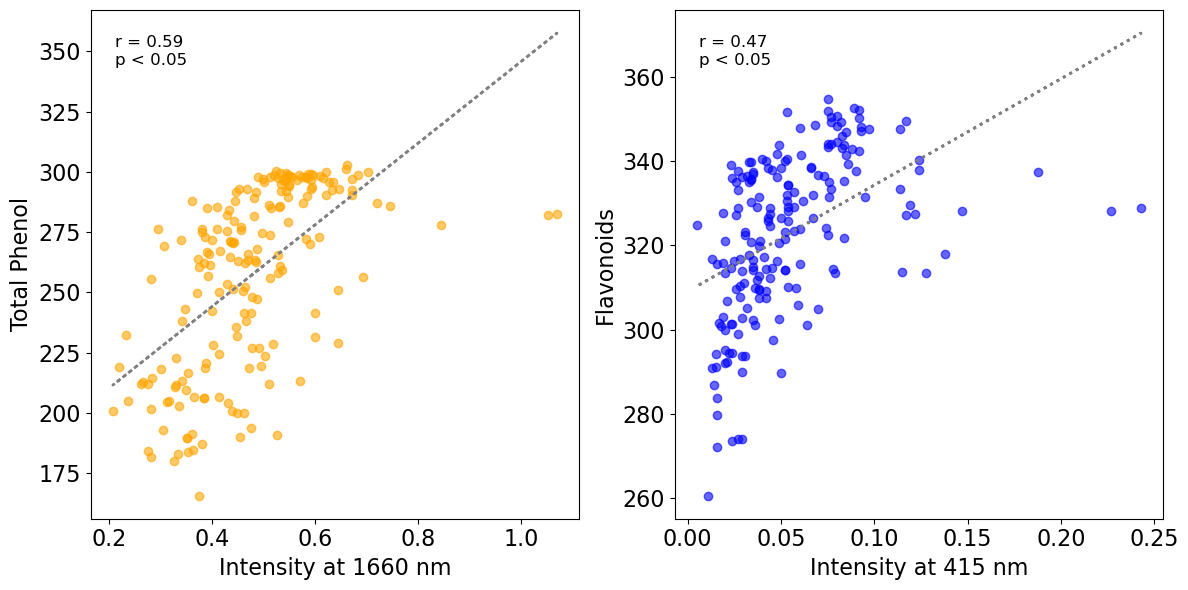

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
dataframe_path = r"C:\Users\bongo\OneDrive\Desktop\Phenolic compound\fire.xlsx"
try:
    df = pd.read_excel(dataframe_path)
except Exception as e:
    print(f"Error loading the data: {e}")
    exit()

# Prepare the feature (X) and target (y) variables
X = df.iloc[:, 5:]  # Raw spectral data (400 to 2500 nm)
flavonoids = df.iloc[:, 3]  # Flavonoids column
phenolics = df.iloc[:, 4]   # Phenolics column

# Select the specific wavelengths
wavelengths = X.columns.values
phenolics_1660nm = X.iloc[:, np.where(wavelengths == 1660)[0][0]]
flavonoids_415nm = X.iloc[:, np.where(wavelengths == 415)[0][0]]

# Calculate correlation coefficients
correlation_phenolics = np.corrcoef(phenolics, phenolics_1660nm)[0, 1]
correlation_flavonoids = np.corrcoef(flavonoids, flavonoids_415nm)[0, 1]

# Calculate regression line and p-value for Phenolics vs 1660 nm
slope_phenolics, intercept_phenolics, r_value_phenolics, p_value_phenolics, std_err_phenolics = stats.linregress(phenolics_1660nm, phenolics)

# Calculate regression line and p-value for Flavonoids vs 415 nm
slope_flavonoids, intercept_flavonoids, r_value_flavonoids, p_value_flavonoids, std_err_flavonoids = stats.linregress(flavonoids_415nm, flavonoids)

# Plotting
plt.figure(figsize=(12, 6))

# Subplot for Phenolics vs 1660 nm
plt.subplot(1, 2, 1)
plt.scatter(phenolics_1660nm, phenolics, color='orange', alpha=0.6)
plt.plot(phenolics_1660nm, slope_phenolics * phenolics_1660nm + intercept_phenolics, color='grey', linestyle=':', linewidth=2)  # Changed to dotted grey line

# Text for r and p-value
plt.text(0.05, 0.95, f'r = {correlation_phenolics:.2f}\np < 0.05' if p_value_phenolics < 0.05 else f'r = {correlation_phenolics:.2f}\np = {p_value_phenolics:.3f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

#plt.title('Phenolics vs 1660 nm')
plt.xlabel('Intensity at 1660 nm', fontsize=16)
plt.ylabel('Total Phenol', fontsize=16)
plt.grid(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Subplot for Flavonoids vs 415 nm
plt.subplot(1, 2, 2)
plt.scatter(flavonoids_415nm, flavonoids, color='blue', alpha=0.6)
plt.plot(flavonoids_415nm, slope_flavonoids * flavonoids_415nm + intercept_flavonoids, color='grey', linestyle=':', linewidth=2)  # Changed to dotted grey line

# Text for r and p-value
plt.text(0.05, 0.95, f'r = {correlation_flavonoids:.2f}\np < 0.05' if p_value_flavonoids < 0.05 else f'r = {correlation_flavonoids:.2f}\np = {p_value_flavonoids:.3f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

#plt.title('Flavonoids vs 415 nm')
plt.xlabel('Intensity at 415 nm', fontsize=16)
plt.ylabel('Flavonoids', fontsize=16)
plt.grid(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()